In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def plot_simulation_times(file, color='C0', label='CPU'): 
    data = np.loadtxt(file, delimiter=",")    
    sizes = data[:, 0]
    times = data[:, 1]

    times_median = []
    for size in np.unique(sizes):
        times_size = times[sizes == size]
        times_median.append(np.median(times_size))

    # times_quartile_40 = []
    # times_quartile_60 = []
    # for size in np.unique(sizes):
    #     times_size = times[sizes == size]
    #     times_quartile_40.append(np.percentile(times_size, 40))
    #     times_quartile_60.append(np.percentile(times_size, 60))

    sizes = np.unique(sizes)

    log_times = np.log2(times_median[-4:])
    coefficients = np.polyfit(sizes[-4:], log_times, 1)
    print(f"Fitted exponential growth rate: {2**coefficients[0]}")
    # plot the fitted curve
    fitted_times = 2**(np.polyval(coefficients, sizes))
    plt.semilogy(sizes, fitted_times, linestyle='--', color=color)

    # plt.errorbar(sizes, times_median, yerr=[np.array(times_median) - np.array(times_quartile_40), np.array(times_quartile_60) - np.array(times_median)], fmt='o', ecolor='r', capsize=5)
    plt.scatter(sizes, times_median, marker='o', color=color, label=label)
    plt.semilogy()

Fitted exponential growth rate: 2.0727781307176296
Fitted exponential growth rate: 1.8109851983328573


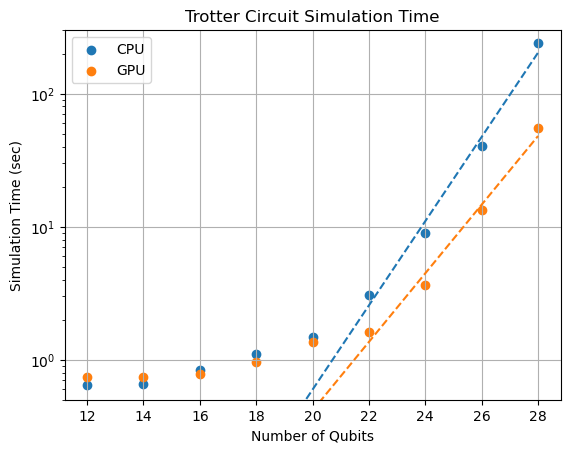

In [13]:
plot_simulation_times("qiskit_CPU_times.txt", color='C0', label='CPU')
plot_simulation_times("qiskit_GPU_times.txt", color='C1', label='GPU')

plt.xlabel("Number of Qubits")
plt.ylabel("Simulation Time (sec)")
plt.title("Trotter Circuit Simulation Time")
plt.grid()
plt.ylim(0.5, 300)
plt.legend()
plt.show()